In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)

100%|██████████| 170M/170M [00:03<00:00, 49.3MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 filters
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Activation 1
        x = self.pool(F.relu(self.conv2(x)))  # Activation 2
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(5):  # Try 5–10 epochs
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.3f}")

Epoch 1, Loss: 2483.143
Epoch 2, Loss: 2045.435
Epoch 3, Loss: 1834.027
Epoch 4, Loss: 1688.485
Epoch 5, Loss: 1571.007


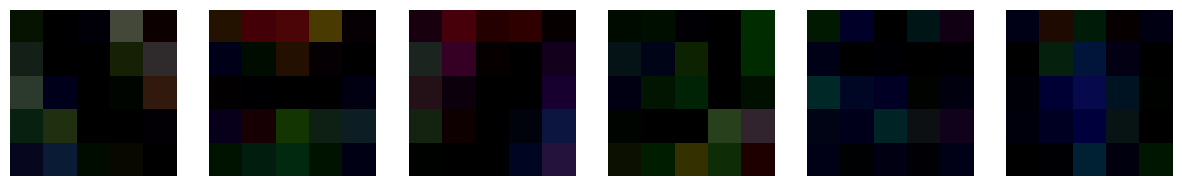

In [ ]:
def visualize_filters(layer_weights):
    filters = layer_weights.clone().detach()
    fig, axs = plt.subplots(1, 6, figsize=(15, 5))
    for i in range(6):
        axs[i].imshow(filters[i].permute(1, 2, 0))
        axs[i].axis('off')
    plt.show()

visualize_filters(net.conv1.weight)

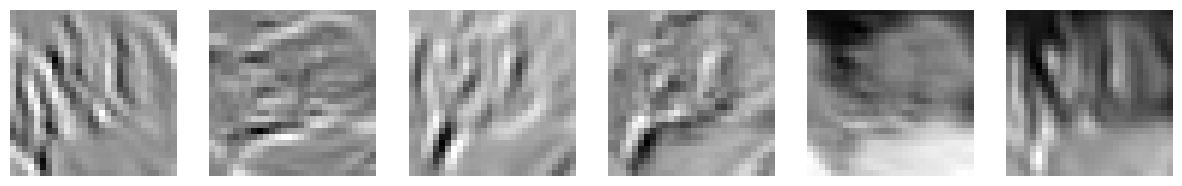

In [ ]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

activation = {}
net.conv1.register_forward_hook(get_activation('conv1'))

# Pass one image
dataiter = iter(testloader)
images, labels = next(dataiter)
output = net(images[0].unsqueeze(0))

# Plot activations
act = activation['conv1'].squeeze()
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    axs[i].imshow(act[i], cmap='gray')
    axs[i].axis('off')
plt.show()